In [8]:
import tensorflow as tf
import random
import numpy as np
import pandas as pd
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
import io



from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [9]:
df = pd.read_csv('train.csv')
df = df.fillna(' ')
df.isna().sum()
X=df['title']
y=df['label']

In [10]:
X=X.reset_index()
X=X.drop(['index'],axis=1)
y=y.reset_index()
y=y.drop(['index'],axis=1)

In [11]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to C:\Users\Arjun
[nltk_data]     Janamatti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
ps=PorterStemmer()
corpus=[]
mes=X.copy()
for i in range(0,len(mes)):
    review=re.sub('[^a-zA-Z]',' ',mes['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if word not in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [13]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time']

In [14]:
voc_size=10000
one_hot_rep=[one_hot(word,voc_size) for word in corpus]
one_hot_rep[:10]

[[9741, 1489, 2653, 5286, 9422, 1405, 439, 9695, 3711, 680],
 [9470, 3788, 965, 7028, 819, 9918, 7313],
 [7995, 3779, 2835, 345],
 [6893, 7374, 496, 5768, 4546, 6145],
 [4909, 819, 5991, 8577, 1364, 200, 819, 6971, 5825, 5775],
 [1245,
  1915,
  936,
  9130,
  7870,
  3418,
  730,
  8047,
  4354,
  6540,
  7944,
  5024,
  6410,
  565,
  7313],
 [9014, 9014, 7787, 2956, 8556, 9783, 2339, 3407, 2882, 8113, 5124, 6199],
 [949, 7075, 2225, 391, 4386, 9508, 1429, 8873, 4274, 1940, 6476],
 [4252,
  5082,
  4120,
  1362,
  3418,
  7082,
  3235,
  3150,
  3535,
  2129,
  4274,
  1940,
  6476],
 [9837, 7749, 721, 2749, 4948, 2787, 3418, 9992, 4274, 1940, 6476]]

In [15]:
# word embedding

sent_len = 20
emb_doc = pad_sequences(one_hot_rep,padding='pre',maxlen=sent_len)
print(emb_doc)

[[   0    0    0 ... 9695 3711  680]
 [   0    0    0 ...  819 9918 7313]
 [   0    0    0 ... 3779 2835  345]
 ...
 [   0    0    0 ... 4274 1940 6476]
 [   0    0    0 ... 8889 8347 8870]
 [   0    0    0 ...  891 8754 2839]]


In [16]:
embedding_vector_features=40
model=Sequential()

model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_len))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            400000    
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               112800    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
import numpy as np
x_final=np.array(emb_doc)
y_final=np.array(y)

In [18]:
x_final.shape,y_final.shape

((20800, 20), (20800, 1))

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_final,
                                                 y_final,
                                                 test_size=0.2,
                                                 random_state=42)

In [20]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                              patience = 3)]
history = model.fit(x_train,
          y_train,
          validation_data=(x_test,y_test),
          epochs = 5,
          batch_size = 64)

Epoch 1/5
260/260 [==============================] - 8s 29ms/step - loss: 0.2543 - accuracy: 0.8875 - val_loss: 0.1855 - val_accuracy: 0.9250
Epoch 2/5
260/260 [==============================] - 7s 28ms/step - loss: 0.1158 - accuracy: 0.9573 - val_loss: 0.2187 - val_accuracy: 0.9269
Epoch 3/5
260/260 [==============================] - 7s 28ms/step - loss: 0.0735 - accuracy: 0.9736 - val_loss: 0.2177 - val_accuracy: 0.9243
Epoch 4/5
260/260 [==============================] - 8s 30ms/step - loss: 0.0486 - accuracy: 0.9846 - val_loss: 0.2570 - val_accuracy: 0.9212
Epoch 5/5
260/260 [==============================] - 8s 30ms/step - loss: 0.0308 - accuracy: 0.9909 - val_loss: 0.3015 - val_accuracy: 0.9248


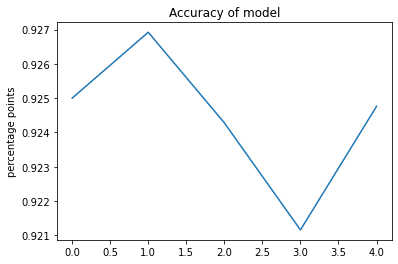

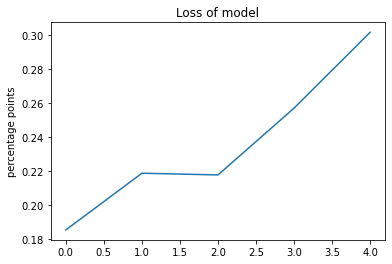

In [21]:
import matplotlib.pyplot as plt

def plot_graphs(history):
    plt.plot(history.history['val_accuracy'])
    plt.ylabel('percentage points')
    plt.title('Accuracy of model')
    plt.show()
    
    plt.plot(history.history['val_loss'])
    plt.ylabel('percentage points')
    plt.title('Loss of model')
    plt.show()

plot_graphs(history)